## Analysis of College Majors

## Introduction:

This analyis focuses on data that comes from the American Community Survey 2010-2012 Public Use Microdata Series. The data contains basic earnings and labor force information. The all-ages.csv contains employment data by major for all ages. The recent-grads.csv contains employment data by major for recent college graduates only. The recent_grads.csv contains more information regarding, sex and employment, so the analysis will focus on that dataset.

## Variables:

There are 173 observations and 21 variables.

- Rank - The major's numerical rank, by post-graduation median earnings
- Major_code - The major's numerical code
- Major - The major's description
- Major_category - The major's category
- Total - The total number of people who studied the major
- Sample_size - Sample size (unweighted) of full-time, year-round students
- Men - The number of men who studied the major
- Women - The number of women who studied the major
- ShareWomen - The share of women (from 0 to 1) who studied the major
- Employed - The number of people who studied the major and obtained a job after graduating
- Full_time - The number of people employed 35 hours or more
- Part_time - The number of people employed less than 35 hours
- Full_time_year_round - The number of people employed at least 50 weeks and at least 35 hours
- Unemployed - The number of people unemployed
- Unemployment_rate - The proportion of people unemployed: Unemployed/(Unemployed+Employed)
- Median - Median earnings of full-time, year-round workers
- P25th - 25th percentile of earnings
- P75th - 75th percentile of earnings
- College_jobs - The number of people with jobs requiring a college degree
- Non_college_jobs - The number of people with jobs not requiring a college degree
- Low_wage_jobs - The number of people with low-wage service jobs



In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [236]:
all_ages = pd.read_csv('all-ages.csv')
recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.shape

(173, 21)

In [237]:
all_ages.shape

(173, 11)

In [238]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


recent_grads is sorted by its ranking, which is based on median salary.

In [239]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [240]:
#summary stats to get a feel for the data
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [241]:
all_ages.head()

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [242]:
all_ages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 11 columns):
Major_code                       173 non-null int64
Major                            173 non-null object
Major_category                   173 non-null object
Total                            173 non-null int64
Employed                         173 non-null int64
Employed_full_time_year_round    173 non-null int64
Unemployed                       173 non-null int64
Unemployment_rate                173 non-null float64
Median                           173 non-null int64
P25th                            173 non-null int64
P75th                            173 non-null float64
dtypes: float64(2), int64(7), object(2)
memory usage: 14.9+ KB


In [243]:
all_ages.describe()

,Major_code,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
count,173.000000,1.730000e+02,1.730000e+02,1.730000e+02,173.000000,173.000000,173.000000,173.000000,173.000000
mean,3879.815029,2.302566e+05,1.661620e+05,1.263078e+05,9725.034682,0.057355,56816.184971,38697.109827,82506.358382
std,1687.753140,4.220685e+05,3.073244e+05,2.424254e+05,18022.040192,0.019177,14706.226865,9414.524761,20805.330126
min,1100.000000,2.396000e+03,1.492000e+03,1.093000e+03,0.000000,0.000000,35000.000000,24900.000000,45800.000000
25%,2403.000000,2.428000e+04,1.728100e+04,1.272200e+04,1101.000000,0.046261,46000.000000,32000.000000,70000.000000
50%,3608.000000,7.579100e+04,5.656400e+04,3.961300e+04,3619.000000,0.054719,53000.000000,36000.000000,80000.000000
75%,5503.000000,2.057630e+05,1.428790e+05,1.110250e+05,8862.000000,0.069043,65000.000000,42000.000000,95000.000000
max,6403.000000,3.123510e+06,2.354398e+06,1.939384e+06,147261.000000,0.156147,125000.000000,78000.000000,210000.000000


Text(0.5,1,'Major Category Counts')

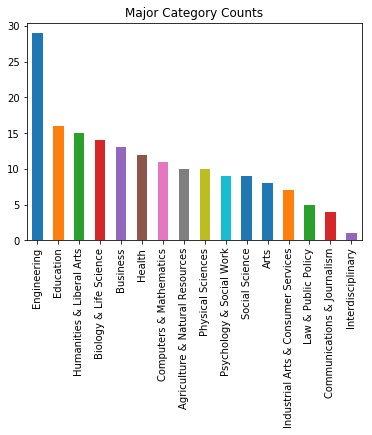

In [244]:
#value frequencies of major categories
recent_grads.Major_category.value_counts().plot.bar()
plt.title('Major Category Counts')

## Visualizing the average median salary by major category. 

The average median salary is 40,151. We can see that Engineering majors had the highest average median salary at 57,383. The max median salary out of all the majors is 110,000, and the min median salary is 22,000.

Text(0,0.5,'Average Median Salary')

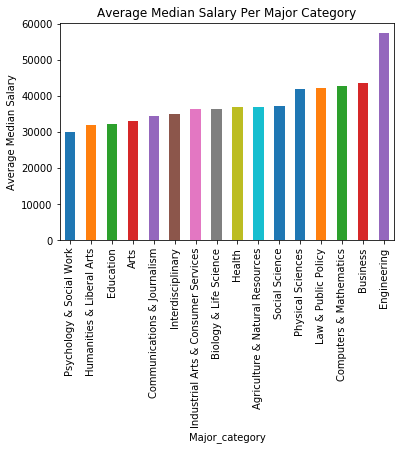

In [245]:
#distribution of average median salaries per major category
#sorted Median salary
recent_grads.groupby('Major_category').Median.mean().sort_values().plot.bar()
plt.title('Average Median Salary Per Major Category')
plt.ylabel('Average Median Salary')

In [246]:
#average median salary of engineering students is $57,382
recent_grads[recent_grads.Major_category == 'Engineering'].Median.mean()

57382.75862068965

Text(0.5,1,'Distribution of Median Salary')

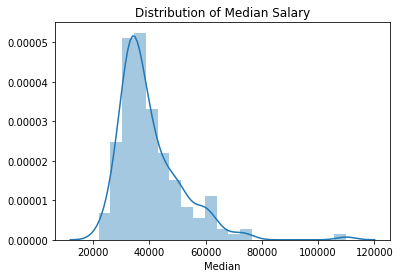

In [247]:
#distribution of median salary
sns.distplot(recent_grads.Median)
plt.title('Distribution of Median Salary')
#right skewed median salary distribution

## Visualizing the distribution of Unemployment rates

The average unemployment rate is around 7%. The max unemployment rate is around 18%, and the min is 0% - some majors had all of their graduates get jobs.

Text(0.5,1,'Distribution of Unemployment Rate')

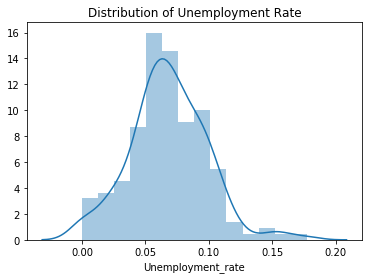

In [248]:
#distribution of unemployment rate
sns.distplot(recent_grads.Unemployment_rate)
plt.title('Distribution of Unemployment Rate')
#right skewed unemployment rate distribution

## The top 5 majors with the greatest median salary:
1. Petroleum Engineering  110,000
2. Mining and Mineral Engineering 75,000
3. Metallurgical Engineering 73,000
4. Naval Architecture and Marine Engineering 70,000
5. Chemical Engineering 65,000

## The bottom 5 majors with the lowest median salary (least to greatest):

1. Library Science 22,000
2. Counseling Pyschology 23,400
3. Educational Pyschology 25,000
4. Clinical Pyschology 25,000
5. Zoology 26,000

In [249]:
#average median salary per major category from greatest to least
recent_grads.groupby('Major_category').Median.mean().sort_values(ascending=False)

Major_category
Engineering                            57382.758621
Business                               43538.461538
Computers & Mathematics                42745.454545
Law & Public Policy                    42200.000000
Physical Sciences                      41890.000000
Social Science                         37344.444444
Agriculture & Natural Resources        36900.000000
Health                                 36825.000000
Biology & Life Science                 36421.428571
Industrial Arts & Consumer Services    36342.857143
Interdisciplinary                      35000.000000
Communications & Journalism            34500.000000
Arts                                   33062.500000
Education                              32350.000000
Humanities & Liberal Arts              31913.333333
Psychology & Social Work               30100.000000
Name: Median, dtype: float64

In [250]:
#top 5 majors ranked by median salary
recent_grads.sort_values(by='Median', ascending=False)[:5]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [251]:
#bottom 5 majors ranked by median salary
recent_grads.sort_values(by='Median')[:5]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743


## 5 majors with the highest amount of low-wage service jobs:

1. Pyschology 48,027
2. Business Management and Administration 32,395
3. Biology 28,339
4. Marketing and Market Research 27,968
5. Communications 27,440

I wanted to know what proportion of students got into low-wage service jobs and discovered that only 9.8% did - a relatively small amount.

In [252]:
Low_wage_jobs_proportion = recent_grads.Low_wage_jobs.sum() / recent_grads.Total.sum()
Low_wage_jobs_proportion*100
#9.8% of graduates were in low wage jobs

9.858891195563151

In [253]:
#top 5 majors who got into low-wage service jobs
recent_grads.sort_values(by='Low_wage_jobs',ascending=False)[:5]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
145,146,5200,PSYCHOLOGY,393735.0,86648.0,307087.0,Psychology & Social Work,0.779933,2584,307933,...,115172,174438,28169,0.083811,31500,24000,41000,125148,141860,48207
76,77,6203,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0,173809.0,156118.0,Business,0.473190,4212,276234,...,50357,199897,21502,0.072218,38000,29000,50000,36720,148395,32395
123,124,3600,BIOLOGY,280709.0,111762.0,168947.0,Biology & Life Science,0.601858,1370,182295,...,72371,100336,13874,0.070725,33400,24000,45000,88232,81109,28339
77,78,6206,MARKETING AND MARKETING RESEARCH,205211.0,78857.0,126354.0,Business,0.615727,2684,178862,...,35829,127230,11663,0.061215,38000,30000,50000,25320,93889,27968
93,94,1901,COMMUNICATIONS,213996.0,70619.0,143377.0,Communications & Journalism,0.669999,2394,179633,...,49889,116251,14602,0.075177,35000,27000,45000,40763,97964,27440


In [254]:
#bottom 5 majors who got into low-wage service jobs
recent_grads.sort_values(by='Low_wage_jobs')[:5]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
112,113,1106,SOIL SCIENCE,685.0,476.0,209.0,Agriculture & Natural Resources,0.305109,4,613,...,185,383,0,0.000000,35000,18500,44000,355,144,0
73,74,3801,MILITARY TECHNOLOGIES,124.0,124.0,0.0,Industrial Arts & Consumer Services,0.000000,4,0,...,0,111,0,0.000000,40000,40000,40000,0,0,0
55,56,2303,SCHOOL STUDENT COUNSELING,818.0,119.0,699.0,Education,0.854523,4,730,...,135,545,88,0.107579,41000,41000,43000,509,221,0


## Top 5 majors with full time year round employment:

1. Business Management and Administration 199,897
2. Pyschology 174,438
3. General Business 138,299
4. Marketing and Marketing Research 127,230
5. Accounting 123,169

## Bottom 5 majors with full time year round employment (least to greatest):

1. Military Technologies 111
2. Metallurgical Engineering 340
3. Soil Science 383
4. Mining and Mineral Engineering 388
5. Mathematics and Computer Science 391

In [255]:
#top 5 majors with full time year round employment
recent_grads.sort_values(by='Full_time_year_round',ascending=False)[:5]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
76,77,6203,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0,173809.0,156118.0,Business,0.473190,4212,276234,...,50357,199897,21502,0.072218,38000,29000,50000,36720,148395,32395
145,146,5200,PSYCHOLOGY,393735.0,86648.0,307087.0,Psychology & Social Work,0.779933,2584,307933,...,115172,174438,28169,0.083811,31500,24000,41000,125148,141860,48207
57,58,6200,GENERAL BUSINESS,234590.0,132238.0,102352.0,Business,0.436302,2380,190183,...,36241,138299,14946,0.072861,40000,30000,55000,29334,100831,27320
77,78,6206,MARKETING AND MARKETING RESEARCH,205211.0,78857.0,126354.0,Business,0.615727,2684,178862,...,35829,127230,11663,0.061215,38000,30000,50000,25320,93889,27968
40,41,6201,ACCOUNTING,198633.0,94519.0,104114.0,Business,0.524153,2042,165527,...,27693,123169,12411,0.069749,45000,34000,56000,11417,39323,10886


In [256]:
#bottom 5 majors with lowest full time year round employment
recent_grads.sort_values(by='Full_time_year_round')[:5]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
73,74,3801,MILITARY TECHNOLOGIES,124.0,124.0,0.0,Industrial Arts & Consumer Services,0.000000,4,0,...,0,111,0,0.000000,40000,40000,40000,0,0,0
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
112,113,1106,SOIL SCIENCE,685.0,476.0,209.0,Agriculture & Natural Resources,0.305109,4,613,...,185,383,0,0.000000,35000,18500,44000,355,144,0
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
52,53,4005,MATHEMATICS AND COMPUTER SCIENCE,609.0,500.0,109.0,Computers & Mathematics,0.178982,7,559,...,0,391,0,0.000000,42000,30000,78000,452,67,25


Text(0,0.5,'Unemployment Rate')

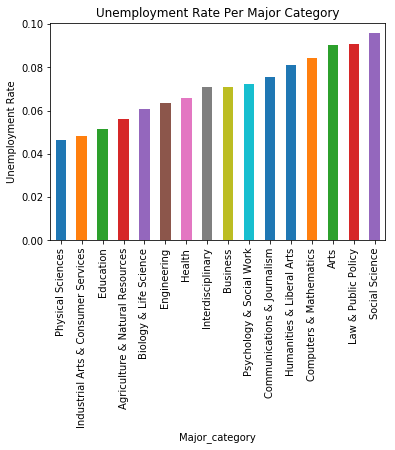

In [257]:
#plotting the average unemloyment rates per major category
recent_grads.groupby('Major_category').Unemployment_rate.mean().sort_values().plot.bar()
plt.title('Unemployment Rate Per Major Category')
plt.ylabel('Unemployment Rate')

In [258]:
#min, max, and mean median unployment rate per major category
recent_grads.groupby('Major_category', sort=True).Unemployment_rate.agg(['min','max', 'mean'])

,min,max,mean
Major_category,,,
Agriculture & Natural Resources,0.000000,0.096931,0.056328
Arts,0.075960,0.105772,0.090173
Biology & Life Science,0.000000,0.085532,0.060918
Business,0.047859,0.096448,0.071064
Communications & Journalism,0.067961,0.089837,0.075538
Computers & Mathematics,0.000000,0.151850,0.084256
Education,0.000000,0.107579,0.051702
Engineering,0.006334,0.177226,0.063334
Health,0.036983,0.112144,0.065920


## Top 5 majors with the greatest unemployment rates:

1. Nuclear Engineering 17.7%
2. Public Administration 15.9%
3. Computer Networking and Telecommunications 15.2%
4. Clinical Pyschology 14.9%
5. Public Policy 12.8%

In [259]:
#top 5 majors with the greatest unemployment rates
recent_grads.sort_values(by='Unemployment_rate', ascending=False)[:5]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,264,1449,400,0.177226,65000,50000,102000,1142,657,244
89,90,5401,PUBLIC ADMINISTRATION,5629.0,2947.0,2682.0,Law & Public Policy,0.476461,46,4158,...,847,2952,789,0.159491,36000,23000,60000,919,2313,496
84,85,2107,COMPUTER NETWORKING AND TELECOMMUNICATIONS,7613.0,5291.0,2322.0,Computers & Mathematics,0.305005,97,6144,...,1447,4369,1100,0.151850,36400,27000,49000,2593,2941,352
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
29,30,5402,PUBLIC POLICY,5978.0,2639.0,3339.0,Law & Public Policy,0.558548,55,4547,...,1306,2776,670,0.128426,50000,35000,70000,1550,1871,340


In [260]:
#bottom 5 majors with the lowest unemployment rates
recent_grads.sort_values(by='Unemployment_rate')[:5]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
120,121,2301,EDUCATIONAL ADMINISTRATION AND SUPERVISION,804.0,280.0,524.0,Education,0.651741,5,703,...,0,504,0,0.0,34000,29000,35000,346,206,111
73,74,3801,MILITARY TECHNOLOGIES,124.0,124.0,0.0,Industrial Arts & Consumer Services,0.000000,4,0,...,0,111,0,0.0,40000,40000,40000,0,0,0
83,84,3602,BOTANY,1329.0,626.0,703.0,Biology & Life Science,0.528969,9,1010,...,169,740,0,0.0,37000,26000,40000,677,184,56
52,53,4005,MATHEMATICS AND COMPUTER SCIENCE,609.0,500.0,109.0,Computers & Mathematics,0.178982,7,559,...,0,391,0,0.0,42000,30000,78000,452,67,25
112,113,1106,SOIL SCIENCE,685.0,476.0,209.0,Agriculture & Natural Resources,0.305109,4,613,...,185,383,0,0.0,35000,18500,44000,355,144,0


Text(0,0.5,'Total Amount')

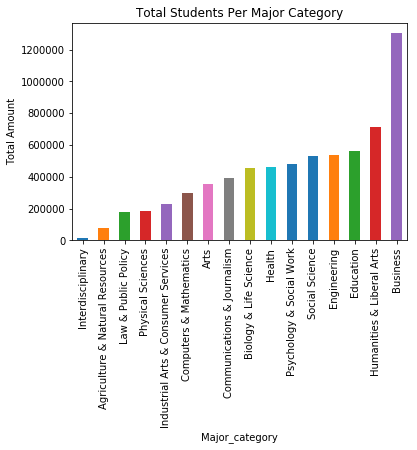

In [261]:
#total amount of students per major category
recent_grads.groupby('Major_category').Total.sum().sort_values().plot.bar()
plt.title('Total Students Per Major Category')
plt.ylabel('Total Amount')
#high amount of business majors
#low amount of interdisciplinary 

In [262]:
#major categories and the total amound of students
all_ages.pivot_table(index='Major_category', values='Total', aggfunc=np.sum).sort_values(by='Total')

,Total
Major_category,
Interdisciplinary,45199
Agriculture & Natural Resources,632437
Law & Public Policy,902926
Physical Sciences,1025318
Industrial Arts & Consumer Services,1033798
Biology & Life Science,1338186
Computers & Mathematics,1781378
Communications & Journalism,1803822
Arts,1805865


In [263]:
business = recent_grads[recent_grads.Major_category == 'Business']
business.Total.sum() / recent_grads.Total.sum()
#19% of students were business majors

0.19232760563371962

In [264]:
#relationship between median salary and unemployment rate
recent_grads[['Median','Unemployment_rate']].corr()
#not much of an association

,Median,Unemployment_rate
Median,1.000000,-0.108833
Unemployment_rate,-0.108833,1.000000


## Now that we've explored median salary, unemployment rates,  low-wage service jobs, and full time year round employment, lets explore the proportion of women (ShareWomen) in each major.

Text(0,0.5,'Proportion')

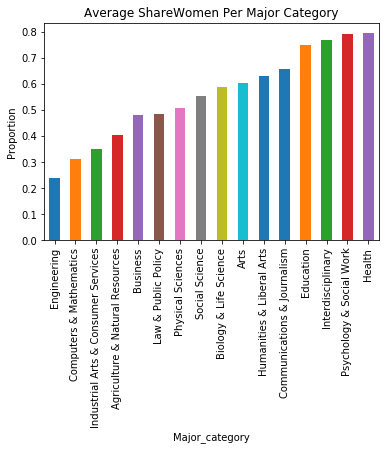

In [265]:
#plotting the average proportion of women per major category
recent_grads.groupby('Major_category').ShareWomen.mean().sort_values().plot(kind='bar')
plt.title('Average ShareWomen Per Major Category')
plt.ylabel('Proportion')
#high in health
#low in engineering

## Top 5 majors with the greatest proportion of women:

1. Early Childhood Education 96.9%
2. Communication Disorders Sciences and Services 96.8%
3. Medical Assisting Services 92.8%
4. Elementary Education 92.4%
5. Family and Consumer Sciences 91.1%

## Bottom 5 majors with the lowest proportion of women (least to greatest):

1. Military Technologies 0%
2. Mechanical Engineering Related Technologies 7.7%
3. Construction Services 9.1%
4. Mining and Mineral Engineering 10.2%
5. Naval Architecture and Marine Engineering 10.7%

In [266]:
#top 5 majors with highest proportion of women
recent_grads.sort_values(by='ShareWomen', ascending=False)[:5]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
164,165,2307,EARLY CHILDHOOD EDUCATION,37589.0,1167.0,36422.0,Education,0.968954,342,32551,...,7001,20748,1360,0.040105,28000,21000,35000,23515,7705,2868
163,164,6102,COMMUNICATION DISORDERS SCIENCES AND SERVICES,38279.0,1225.0,37054.0,Health,0.967998,95,29763,...,13862,14460,1487,0.047584,28000,20000,40000,19957,9404,5125
51,52,6104,MEDICAL ASSISTING SERVICES,11123.0,803.0,10320.0,Health,0.927807,67,9168,...,4107,4290,407,0.042507,42000,30000,65000,2091,6948,1270
138,139,2304,ELEMENTARY EDUCATION,170862.0,13029.0,157833.0,Education,0.923745,1629,149339,...,37965,86540,7297,0.046586,32000,23400,38000,108085,36972,11502
150,151,2901,FAMILY AND CONSUMER SCIENCES,58001.0,5166.0,52835.0,Industrial Arts & Consumer Services,0.910933,518,46624,...,15872,26906,3355,0.067128,30000,22900,40000,20985,20133,5248


In [267]:
#bottom 5 majors with lowest proportion of women
recent_grads.sort_values(by='ShareWomen')[:5]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
73,74,3801,MILITARY TECHNOLOGIES,124.0,124.0,0.0,Industrial Arts & Consumer Services,0.000000,4,0,...,0,111,0,0.000000,40000,40000,40000,0,0,0
66,67,2504,MECHANICAL ENGINEERING RELATED TECHNOLOGIES,4790.0,4419.0,371.0,Engineering,0.077453,71,4186,...,247,3607,250,0.056357,40000,27000,52000,1861,2121,406
26,27,5601,CONSTRUCTION SERVICES,18498.0,16820.0,1678.0,Industrial Arts & Consumer Services,0.090713,295,16318,...,1751,12313,1042,0.060023,50000,36000,60000,3275,5351,703
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0


## I noticed an interesting trend between the proportion of women and median salary, so I investigated it further and found some interesting results: 

There is a negative association between the amount of women in a major and their median salary. They have a correlation coefficient of -0.619, which shows us a strong negative association. 

Text(0.5,1,'Relatioship Between Median Salary and the Proportion of Women')

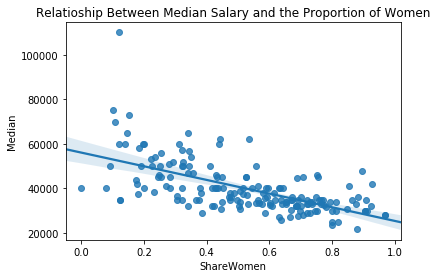

In [268]:
#plotting the relationship between ShareWomen and Median
sns.regplot('ShareWomen', 'Median', data=recent_grads)
plt.title('Relatioship Between Median Salary and the Proportion of Women')
#negative association between the proportion of women and median salary

In [271]:
#stratifying the proportion of women into 5 categories to correlate
#ShareWomen and Median
def gen_sharewomen(row):
    sharewomen = row['ShareWomen']
    if sharewomen >= .75:
        return '75%'
    elif sharewomen >= .50:
        return '50%'
    elif sharewomen >= .25:
        return '25%'
    elif sharewomen >= .125:
        return '12.5%'
    elif sharewomen >= .05:
        return '5%'
sharewomen_labels = recent_grads.apply(gen_sharewomen, axis=1)
recent_grads['ShareWomen_labels'] = sharewomen_labels

In [276]:
#the lower the proportion of women, the higher the average median salary is
recent_grads.pivot_table(index='ShareWomen_labels', values='Median').sort_values(by='Median', ascending=False)

,Median
ShareWomen_labels,
5%,62857.142857
12.5%,50605.555556
25%,43604.000000
50%,35335.384615
75%,33074.193548


In [278]:
recent_grads[['ShareWomen', 'Median']].corr()

,ShareWomen,Median
ShareWomen,1.00000,-0.61869
Median,-0.61869,1.00000


## Comparing and contrasting sample (recent_grads.csv) and population (all_ages.csv)

In [187]:
#all majors, common to both DataFrames
#number of majors where recent graduates did better than the overall population (all_ages.csv)
majors = recent_grads.Major.unique()
rg_lower_count = 0

for x in majors:
    recent_grads_row = recent_grads[recent_grads.Major == x]
    
    all_ages_row = all_ages[all_ages.Major == x]
    
    rg_unemp_rate = recent_grads_row.iloc[0].Unemployment_rate
    
    aa_unemp_rate = all_ages_row.iloc[0].Unemployment_rate
    
    if rg_unemp_rate < aa_unemp_rate:
        rg_lower_count += 1
rg_lower_count
#44 majors where the sample unemployment rate was less than the populations unemployment rate

44


In [215]:
all_ages.Median.mean()
#the average median salary of the population is $56,816
#compared to the sample statisitc $40,151

56816.184971098264

In [284]:
parameter = all_ages.Median.mean()
statistic = recent_grads.Median.mean()
sampling_error = parameter - statistic
sampling_error
#parameter - statistic = $16,665 is the sampling error
#parameter - statistic / parameter 
#sampling_error/parameter = 0.29
sampling_error/parameter

0.29330973019167383

In [285]:
all_ages.groupby('Major_category').Median.mean().sort_values(ascending=False)
#highest median salary is $77,758

Major_category
Engineering                            77758.620690
Computers & Mathematics                66272.727273
Physical Sciences                      62400.000000
Business                               60615.384615
Health                                 56458.333333
Agriculture & Natural Resources        55000.000000
Social Science                         53222.222222
Law & Public Policy                    52800.000000
Industrial Arts & Consumer Services    52642.857143
Biology & Life Science                 50821.428571
Communications & Journalism            49500.000000
Humanities & Liberal Arts              46080.000000
Psychology & Social Work               44555.555556
Education                              43831.250000
Arts                                   43525.000000
Interdisciplinary                      43000.000000
Name: Median, dtype: float64

## Conclusion:

Thus far we've discovered some intersting information from the recent_grads.csv. We have seen which majors had the highest median salary, the greatest unemployment rate, the greatest proportion of women, and the highest number of students who got into low-wage service jobs.

Here are some takeaways:

1. The average median salary is 40,151. Engineering majors had the highest average median salary at 57,383. Petroleum Engineering had the highest median salary 110,000. Library Science had the lowest median salary 22,000.
2. I wanted to know what proportion of students got into low-wage service jobs and discovered that only 9.8% did - a relatively small amount. Pyschology majors had the greatest amount of low-wage service jobs 48,027. Majors had an average of 3,859 low-wage service jobs.
3. Business Management and Administration had the greatest amount of full time year round employment 199,897. Military Technologies had the lowest amount of full time year round employment 111. Majors had an average of 19,694 full time year round employment.
4. Nuclear Engineering  had the greatest unemployment rate 17.7%. The average unemployment rate was 6.8%.
5. Business majors had the greatest amount of students 9,858,741 - 19% of students were business majors.
6. Early Childhood Education had the greatest proportion of women 96.9%. Military Technologies had the lowest proportio of women 0%.
7. There is a negative association between the amount of women in a major and their median salary. They have a correlation coefficient of -0.619, which shows us a strong negative association.


